In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec, FastText
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [28]:
# Charger les fichiers nécessaires
df1 = pd.read_csv('books_dataset.xls', encoding='latin1')
df2 = pd.read_csv('Users.csv', encoding='latin1')
df3 = pd.read_csv('Ratings.csv', encoding='latin1')


In [29]:
# Vérifier le chargement des données
print("Aperçu de books_dataset:")
print(df1.head())
print("Aperçu de Users:")
print(df2.head())
print("Aperçu de Ratings:")
print(df3.head())

Aperçu de books_dataset:
         ISBN              Book-Title       Book-Author  Year-Of-Publication  \
0  0399135782  The Kitchen God's Wife           Amy Tan                 1991   
1  0440234743           The Testament      John Grisham                 1999   
2  0345402871                Airframe  Michael Crichton                 1997   
3  055321215X     Pride and Prejudice       Jane Austen                 1983   
4  055321215X     Pride and Prejudice       Jane Austen                 1983   

          Publisher         categories  \
0  Putnam Pub Group            Fiction   
1              Dell            Fiction   
2  Ballantine Books  Adventure stories   
3            Bantam          Courtship   
4            Bantam            Fiction   

                                         description  
0  Winnie Louie, an aging Chinese woman convinced...  
1  A suicidal billionaire, a burnt-out Washington...  
2  The twin jet plane en route to Denver from Hon...  
3                    

**TF-IDF**

In [30]:
# Préparer les descriptions
corpus = df1['description'].fillna('').tolist()

# Créer une matrice TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Limiter à 500 caractéristiques pour simplifier
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# Convertir la matrice en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=[f'tfidf_{i}' for i in range(X_tfidf.shape[1])])

# Ajouter les colonnes TF-IDF au DataFrame principal
data_with_tfidf = pd.concat([df1, tfidf_df], axis=1)

# Vérifier les résultats de TF-IDF
print("Aperçu des colonnes TF-IDF ajoutées:")
print(tfidf_df.head(10))

Aperçu des colonnes TF-IDF ajoutées:
    tfidf_0  tfidf_1  tfidf_2  tfidf_3  tfidf_4  tfidf_5  tfidf_6  tfidf_7  \
0  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7  0.207116      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

    tfidf_8   tfidf_9  ...  tfidf_490  tfidf_491  tfidf_492  tfidf_493  \
0  0.000000  0.000000  ...    

**Doc2Vec**

In [31]:
# Préparer les documents étiquetés pour Doc2Vec
tagged_data = [TaggedDocument(words=desc.split(), tags=[str(i)]) for i, desc in enumerate(corpus)]

# Entraîner le modèle Doc2Vec
print("Entraînement du modèle Doc2Vec...")
model_doc2vec = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs=20)
print("Modèle Doc2Vec entraîné.")

# Générer les vecteurs Doc2Vec pour chaque description
doc2vec_vectors = [model_doc2vec.infer_vector(desc.split()) for desc in corpus]

doc2vec_df = pd.DataFrame(doc2vec_vectors, columns=[f'doc2vec_{i}' for i in range(model_doc2vec.vector_size)])

# Ajouter les colonnes Doc2Vec au DataFrame principal
data_with_embeddings = pd.concat([data_with_tfidf, doc2vec_df], axis=1)

# Vérifier les résultats de Doc2Vec
print("Aperçu des colonnes Doc2Vec ajoutées:")
print(doc2vec_df.head())

Entraînement du modèle Doc2Vec...
Modèle Doc2Vec entraîné.
Aperçu des colonnes Doc2Vec ajoutées:
   doc2vec_0  doc2vec_1  doc2vec_2  doc2vec_3  doc2vec_4  doc2vec_5  \
0   0.119887   0.090316   0.472606   0.211700   0.095310  -0.150831   
1   0.209986   0.004301   0.027052   0.028312  -0.047062  -0.199944   
2  -0.106492   0.181760   0.021384   0.258521  -0.276261   0.133017   
3  -0.074880   0.011284   0.047534   0.023553  -0.022958  -0.036093   
4  -0.033589   0.051174   0.054462   0.073290  -0.177760  -0.112618   

   doc2vec_6  doc2vec_7  doc2vec_8  doc2vec_9  ...  doc2vec_40  doc2vec_41  \
0   0.145744   0.017786  -0.704561   0.038608  ...    0.407453    0.109327   
1   0.132386   0.137564  -0.293302   0.077662  ...    0.338355    0.217974   
2   0.444855   0.299019  -0.648805   0.287508  ...    0.291881    0.309238   
3   0.058174   0.055711  -0.084350  -0.001164  ...    0.108047    0.023953   
4   0.158028   0.119743  -0.363835  -0.051466  ...    0.275354    0.292764   

   doc2

**Word2Vec**

In [32]:
# Préparer les données pour Word2Vec
sentences = [desc.split() for desc in corpus]

# Entraîner le modèle Word2Vec
print("Entraînement du modèle Word2Vec...")
model_word2vec = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4, sg=0, epochs=20)
print("Modèle Word2Vec entraîné.")

# Générer un exemple de vecteur Word2Vec pour un mot
test_word = "book"
if test_word in model_word2vec.wv:
    print(f"Vecteur Word2Vec pour le mot '{test_word}':")
    print(model_word2vec.wv[test_word])
else:
    print(f"Le mot '{test_word}' n'est pas dans le vocabulaire de Word2Vec.")

Entraînement du modèle Word2Vec...
Modèle Word2Vec entraîné.
Vecteur Word2Vec pour le mot 'book':
[ 0.00682638  3.928319   -2.3897061   1.7287313   6.5242677  -2.6711211
  4.8614616   1.3956443   2.9404843  -1.711715    4.088329   -2.3549812
  0.7736911   0.70597214 -3.466176    0.02830493 -0.27435255  2.2154133
 -1.1403888   0.56228137  3.4119337  -1.5669222  -2.1113217  -0.60487527
  0.19276105 -1.7968434   3.4358048  -0.9404154  -0.5396998  -0.47378543
  1.3861767  -1.668135   -1.5607824  -1.0258     -0.51500136  4.521861
  3.795845    2.8500495   1.1860144   0.8693348   2.5357695  -2.2599075
  4.283493   -0.9680183  -4.2545643   1.1804167  -0.85740834 -0.5804874
  3.190816    5.3754697 ]


**FastText**

In [34]:
# Entraîner le modèle FastText
print("Entraînement du modèle FastText...")
model_fasttext = FastText(sentences, vector_size=50, window=5, min_count=1, workers=4, sg=0, epochs=20)
print("Modèle FastText entraîné.")

# Générer un exemple de vecteur FastText pour un mot
if test_word in model_fasttext.wv:
    print(f"Vecteur FastText pour le mot '{test_word}':")
    print(model_fasttext.wv[test_word])
else:
    print(f"Le mot '{test_word}' n'est pas dans le vocabulaire de FastText.")

Entraînement du modèle FastText...
Modèle FastText entraîné.
Vecteur FastText pour le mot 'book':
[ 3.8542974   2.8335457   1.4436307  -8.235943    5.075899    1.7765727
  0.56687135  1.5380058   2.1235075  -0.9245687  -0.6383604  -0.05426599
 -6.4997864   6.605357   -3.3591769  -2.3513303   1.6575935  -1.0309576
  2.713832    6.823413    3.3529687   0.1266688  -8.411869    4.665853
 -1.964214    2.154764   -0.41276053 -1.5144166   4.4863935  -2.3798223
  0.95584255  2.6143055   0.9710264  -0.95110166  3.3670554   0.01518533
 -1.5355729   3.5516288   7.793636    3.6766403   2.9582613  -2.1337774
  0.7368591   1.1269444  -0.547987   -4.3874087  -4.33209     5.963896
  1.9644673   3.5696218 ]


**Visualisation**

Visualisation des relations sémantiques avec PCA pour Word2Vec...


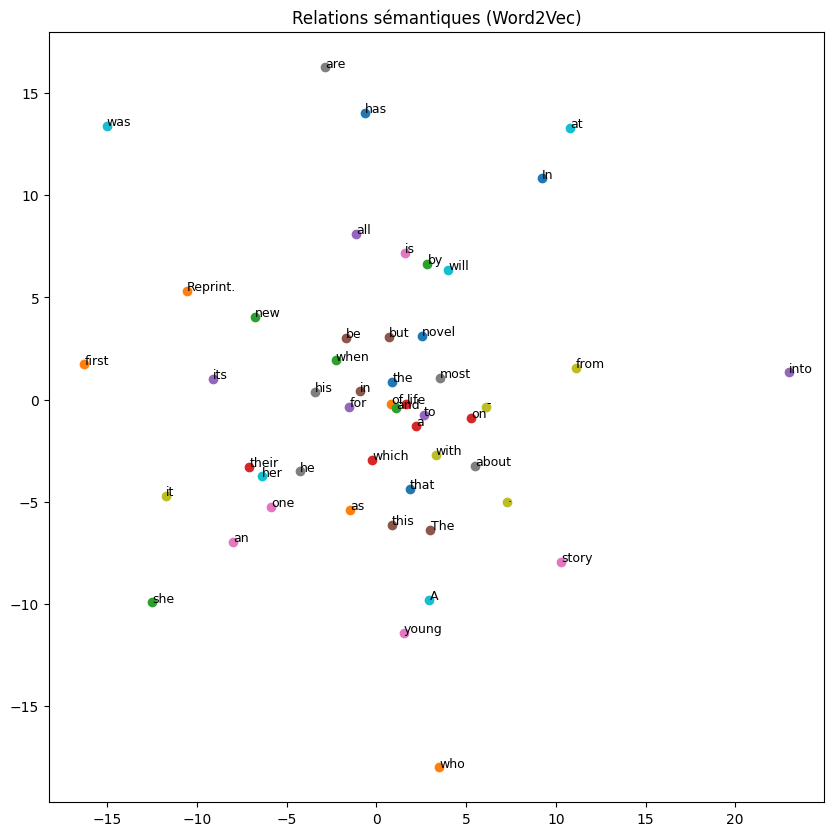

Visualisation des relations sémantiques avec PCA pour FastText...


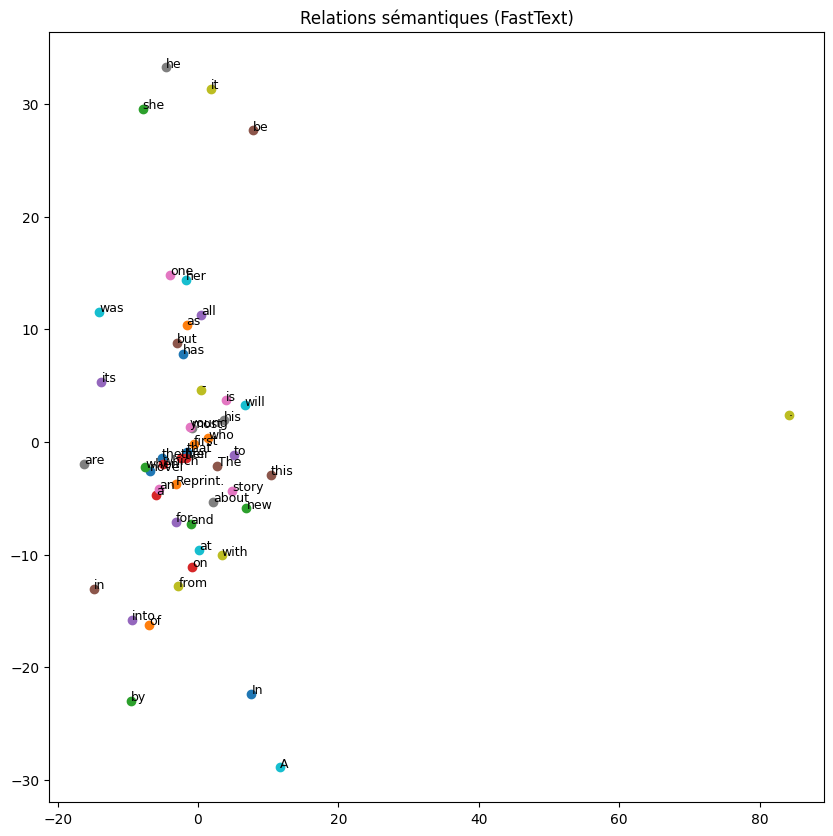

In [35]:
print("Visualisation des relations sémantiques avec PCA pour Word2Vec...")
words = list(model_word2vec.wv.index_to_key)[:50]
word_vectors = model_word2vec.wv[words]
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0] + 0.01, word_vectors_2d[i, 1] + 0.01, word, fontsize=9)
plt.title("Relations sémantiques (Word2Vec)")
plt.show()

print("Visualisation des relations sémantiques avec PCA pour FastText...")
words_ft = list(model_fasttext.wv.index_to_key)[:50]
word_vectors_ft = model_fasttext.wv[words_ft]
word_vectors_ft_2d = pca.fit_transform(word_vectors_ft)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words_ft):
    plt.scatter(word_vectors_ft_2d[i, 0], word_vectors_ft_2d[i, 1])
    plt.text(word_vectors_ft_2d[i, 0] + 0.01, word_vectors_ft_2d[i, 1] + 0.01, word, fontsize=9)
plt.title("Relations sémantiques (FastText)")
plt.show()


**Comparaison des méthodes de vectorisation**

In [39]:

# Calcul de la similarité moyenne des descriptions entre toutes les paires pour chaque méthode
def compute_mean_similarity(vectors, method_name):
    similarities = cosine_similarity(vectors)
    mean_similarity = similarities.mean()
    print(f"Similarité moyenne pour {method_name}: {mean_similarity:.4f}")
    return mean_similarity


In [38]:
# TF-IDF
mean_tfidf = compute_mean_similarity(X_tfidf.toarray(), "TF-IDF")

# Doc2Vec
mean_doc2vec = compute_mean_similarity(doc2vec_df.to_numpy(), "Doc2Vec")

# Word2Vec
word2vec_vectors = [model_word2vec.wv[desc.split()].mean(axis=0) for desc in corpus if desc.split()]
mean_word2vec = compute_mean_similarity(word2vec_vectors, "Word2Vec")

# FastText
fasttext_vectors = [model_fasttext.wv[desc.split()].mean(axis=0) for desc in corpus if desc.split()]
mean_fasttext = compute_mean_similarity(fasttext_vectors, "FastText")

# Identifier la meilleure méthode
best_method = max(
    [("TF-IDF", mean_tfidf), ("Doc2Vec", mean_doc2vec), ("Word2Vec", mean_word2vec), ("FastText", mean_fasttext)],
    key=lambda x: x[1]
)
print(f"La meilleure méthode est {best_method[0]} avec une similarité moyenne de {best_method[1]:.4f}.")

Similarité moyenne pour TF-IDF: 0.1225
Similarité moyenne pour Doc2Vec: 0.4966
Similarité moyenne pour Word2Vec: 0.5909
Similarité moyenne pour FastText: 0.5502
La meilleure méthode est Word2Vec avec une similarité moyenne de 0.5909.


**Sauvegarde**

In [40]:
# Sauvegarde finale
data_with_embeddings = pd.concat([df1, tfidf_df, doc2vec_df], axis=1)
data_with_embeddings.to_csv('books_with_embeddings.csv', index=False)
print("Toutes les données vectorisées sauvegardées dans 'books_with_embeddings.csv'.")


Toutes les données vectorisées sauvegardées dans 'books_with_embeddings.csv'.
